Data Exploration and Preprocessing
● Analyze the dataset for trends, missing values, and outliers.
o Perform basic data exploration, such as checking for missing values,
identifying imbalanced classes (positive/negative), and analyzing the length of
reviews.
● Perform data cleaning and text preprocessing.
o Steps will include:
▪ Removing stop words, punctuation, and special characters.
▪ Tokenization of text (splitting text into words).
▪ Lemmatization and stemming.
 ▪ Vectorization using techniques like Bag-of-Words and TF-IDF

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
from google.colab import files
uploaded = files.upload()  # Manually select your file
data = pd.read_csv(next(iter(uploaded)))
data = pd.read_csv("Imdb - data_imdb.csv")

# Task 1: Analyze dataset
print("Missing values:\n", data.isnull().sum())
print("\nClass distribution:\n", data['sentiment'].value_counts())

# Task 2: Text preprocessing
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

data['cleaned_review'] = data['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Saving Imdb - data_imdb.csv to Imdb - data_imdb (1).csv
Missing values:
 review       0
sentiment    0
dtype: int64

Class distribution:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


2. Feature Engineering
● Feature extraction using techniques like TF-IDF, Word2Vec, or embeddings.
o Transform the textual data into numerical features that can be used by
machine learning models.
● Textual features: Word count, character count, average word length, etc.

In [6]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['cleaned_review'])
y = data['sentiment'].map({'positive': 1, 'negative': 0})

# Additional textual features
data['word_count'] = data['cleaned_review'].apply(lambda x: len(x.split()))
data['char_count'] = data['cleaned_review'].apply(len)
data['avg_word_length'] = data['char_count'] / data['word_count']

3. Model Development
● Build and train classification models to predict the sentiment of reviews.
o Experiment with various classification algorithms such as Logistic Regression,
Naive Bayes, Support Vector Machine (SVM), Random Forest, and Neural
Networks (e.g., LSTM, BERT, etc.).

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.2f}")

Logistic Regression Accuracy: 0.88
Naive Bayes Accuracy: 0.85
SVM Accuracy: 0.89
Random Forest Accuracy: 0.85


4. Model Evaluation
● Evaluate the model’s performance using appropriate metrics.


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



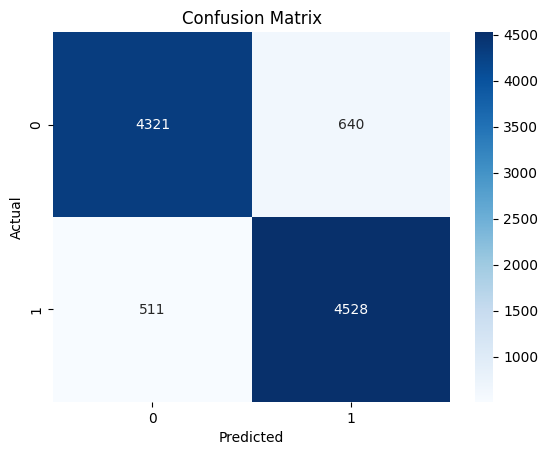

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Best model (Logistic Regression in this case)
best_model = LogisticRegression()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()